<br><br>
<font size='6'><b>Exercise for Artificial Neural Networks
</b></font><br><br>

<br>
<div class=pull-right>
By Prof. Seungchul Lee<br>
http://iai.postech.ac.kr/<br>
Industrial AI Lab at POSTECH
</div>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Problem-Definition" data-toc-modified-id="1.-Problem-Definition-1">1. Problem Definition</a></span></li><li><span><a href="#2.-Load-Data" data-toc-modified-id="2.-Load-Data-2">2. Load Data</a></span></li><li><span><a href="#3.-Data-preprocessing" data-toc-modified-id="3.-Data-preprocessing-3">3. Data preprocessing</a></span><ul class="toc-item"><li><span><a href="#3.1.-Normalization" data-toc-modified-id="3.1.-Normalization-3.1">3.1. Normalization</a></span></li><li><span><a href="#3.2.-Label-Encoding" data-toc-modified-id="3.2.-Label-Encoding-3.2">3.2. Label Encoding</a></span></li></ul></li><li><span><a href="#4.-ANN-Model" data-toc-modified-id="4.-ANN-Model-4">4. ANN Model</a></span><ul class="toc-item"><li><span><a href="#4.1.-Base-model" data-toc-modified-id="4.1.-Base-model-4.1">4.1. Base model</a></span></li><li><span><a href="#4.2.-Not-normalized-VS-Normalized-(Input-Scaling)" data-toc-modified-id="4.2.-Not-normalized-VS-Normalized-(Input-Scaling)-4.2">4.2. Not normalized VS Normalized (Input Scaling)</a></span></li><li><span><a href="#4.3.-Batch-Normalization-(Feature-Scaling)" data-toc-modified-id="4.3.-Batch-Normalization-(Feature-Scaling)-4.3">4.3. Batch Normalization (Feature Scaling)</a></span></li><li><span><a href="#4.4.-Validation-to-prevent-&quot;Overfitting&quot;" data-toc-modified-id="4.4.-Validation-to-prevent-&quot;Overfitting&quot;-4.4">4.4. Validation to prevent <em>"Overfitting"</em></a></span></li></ul></li></ul></div>

# 1. Problem Definition

__Steel Plates Faults Dataset__

- Input: 27 features (Attributes)
- Output: 7 classes (7 Types of Steel Plates Faults) 


# 2. Load Data

Import library first

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd

Load data

In [2]:
df = pd.read_csv('./data_files/BigML_Steel_Plates_Faults.csv')
df

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Fault
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,Pastry
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,Pastry
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,Pastry
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,Pastry
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,Pastry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,249,277,325780,325796,273,54,22,35033,119,141,...,0.5185,0.7273,0.0,2.4362,1.4472,1.2041,-0.4286,0.0026,0.7254,Other_Faults
1937,144,175,340581,340598,287,44,24,34599,112,133,...,0.7046,0.7083,0.0,2.4579,1.4914,1.2305,-0.4516,-0.0582,0.8173,Other_Faults
1938,145,174,386779,386794,292,40,22,37572,120,140,...,0.7250,0.6818,0.0,2.4654,1.4624,1.1761,-0.4828,0.0052,0.7079,Other_Faults
1939,137,170,422497,422528,419,97,47,52715,117,140,...,0.3402,0.6596,0.0,2.6222,1.5185,1.4914,-0.0606,-0.0171,0.9919,Other_Faults


Check column list

In [3]:
col = df.columns
col

Index(['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas', 'Fault'],
      dtype='object')

We need to seperate data and label.(fault type)

In [4]:
X = df.drop('Fault',1)

In [5]:
Y = df['Fault']

# 3. Data preprocessing

## 3.1. Normalization 

Check whether labels are seperated from data.

In [6]:
X

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.0047,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.0036,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.0037,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.0052,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.0126,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,249,277,325780,325796,273,54,22,35033,119,141,...,0.0206,0.5185,0.7273,0.0,2.4362,1.4472,1.2041,-0.4286,0.0026,0.7254
1937,144,175,340581,340598,287,44,24,34599,112,133,...,0.0228,0.7046,0.7083,0.0,2.4579,1.4914,1.2305,-0.4516,-0.0582,0.8173
1938,145,174,386779,386794,292,40,22,37572,120,140,...,0.0213,0.7250,0.6818,0.0,2.4654,1.4624,1.1761,-0.4828,0.0052,0.7079
1939,137,170,422497,422528,419,97,47,52715,117,140,...,0.0243,0.3402,0.6596,0.0,2.6222,1.5185,1.4914,-0.0606,-0.0171,0.9919


Transform data table to numpy array

In [6]:
x_np = X.values

# Print array
x_np

array([[42, 50, 270900, ..., 0.8182, -0.2913, 0.5822],
       [645, 651, 2538079, ..., 0.7931, -0.1756, 0.2984],
       [829, 835, 1553913, ..., 0.6667, -0.1228, 0.215],
       ...,
       [145, 174, 386779, ..., -0.4828, 0.0052, 0.7079],
       [137, 170, 422497, ..., -0.0606, -0.0171, 0.9919],
       [1261, 1281, 87951, ..., -0.2, -0.1139, 0.5296]], dtype=object)

Normalize data value between 0 to 1

In [7]:
from sklearn.preprocessing import minmax_scale
'''
minmax_scale
(Hint : sklearn 사용)
x_np -> normalize
'''
x_norm = minmax_scale(x_np)
x_norm

array([[0.02463343, 0.02691633, 0.02035198, ..., 0.91249307, 0.43120049,
        0.52576617],
       [0.37829912, 0.37858397, 0.19500631, ..., 0.89983356, 0.50170628,
        0.20363224],
       [0.48621701, 0.48624927, 0.11919013, ..., 0.83608211, 0.53388178,
        0.10896708],
       ...,
       [0.08504399, 0.09947338, 0.02927883, ..., 0.25631714, 0.611883  ,
        0.66844495],
       [0.08035191, 0.09713283, 0.0320304 , ..., 0.46925909, 0.59829372,
        0.9908059 ],
       [0.73958944, 0.7472206 , 0.00625833, ..., 0.39895093, 0.5393053 ,
        0.46606129]])

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_norm = scaler.fit_transform(x_np)
x_norm

array([[0.02463343, 0.02691633, 0.02035198, ..., 0.91249307, 0.43120049,
        0.52576617],
       [0.37829912, 0.37858397, 0.19500631, ..., 0.89983356, 0.50170628,
        0.20363224],
       [0.48621701, 0.48624927, 0.11919013, ..., 0.83608211, 0.53388178,
        0.10896708],
       ...,
       [0.08504399, 0.09947338, 0.02927883, ..., 0.25631714, 0.611883  ,
        0.66844495],
       [0.08035191, 0.09713283, 0.0320304 , ..., 0.46925909, 0.59829372,
        0.9908059 ],
       [0.73958944, 0.7472206 , 0.00625833, ..., 0.39895093, 0.5393053 ,
        0.46606129]])

In [50]:
# Print shape
x_norm.shape

(1941, 27)

## 3.2. Label Encoding

Labels are written in string type.

In [9]:
Y

0             Pastry
1             Pastry
2             Pastry
3             Pastry
4             Pastry
            ...     
1936    Other_Faults
1937    Other_Faults
1938    Other_Faults
1939    Other_Faults
1940    Other_Faults
Name: Fault, Length: 1941, dtype: object

 You should encode labels in numeric type

In [9]:
Y.value_counts()

Other_Faults    673
Bumps           402
K_Scatch        391
Z_Scratch       190
Pastry          158
Stains           72
Dirtiness        55
Name: Fault, dtype: int64

In [10]:
y_class_list = pd.Categorical(Y)
y_class = pd.Categorical(Y).codes
y_class

array([4, 4, 4, ..., 3, 3, 3], dtype=int8)

# 4. ANN Model

## 4.1. Base model

Define model parameters

In [11]:
n_input = 27   # feature 27 
n_hidden1 = 100
n_hidden2 = 50
n_output = 7   # label 7

Define model structure

In [20]:
# Define Structure
# activation function: relu, softmax
model = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape = (n_input)),
        tf.keras.layers.Dense(n_hidden1, activation = tf.nn.relu),
        tf.keras.layers.Dense(n_hidden2, activation = 'relu'),
        tf.keras.layers.Dense(n_output, activation = 'softmax')
    ])

Define model compiler. You can choose loss, metrics and optimizer

In [21]:
# adam optimizer, cross entropy
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy', # softmax해서 나온 것과 one hot encoding이 다르기 떄문에 sparse
              metrics = ['accuracy'])

Dataset have to be seperated in trainset and testset.

## 4.2. Not normalized VS Normalized (Input Scaling)

Seperate Dataset.

In [12]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_Y, test_Y = train_test_split(x_np, y_class)
train_X = train_X.astype(np.float32)
test_X = test_X.astype(np.float32)

In [13]:
train_X_n, test_X_n, train_Y_n, test_Y_n = train_test_split(x_norm, y_class)
train_X_n = train_X_n.astype(np.float32)
test_X_n = test_X_n.astype(np.float32)

Define training parameter

In [14]:
n_batch = 64    # Batch Size
n_epoch = 500  # Learning epoch

Train it 

In [22]:
%%time

training_records = model.fit(train_X, train_Y, batch_size = n_batch,
                            epochs=n_epoch)

Epoch 1/500
23/23 [==============================] - 0s 2ms/step - loss: 85348.2812 - accuracy: 0.2784
Epoch 2/500
23/23 [==============================] - 0s 2ms/step - loss: 25664.1230 - accuracy: 0.3189
Epoch 3/500
23/23 [==============================] - 0s 3ms/step - loss: 17124.5684 - accuracy: 0.3430
Epoch 4/500
23/23 [==============================] - 0s 3ms/step - loss: 7935.0527 - accuracy: 0.3643
Epoch 5/500
23/23 [==============================] - 0s 3ms/step - loss: 12304.1104 - accuracy: 0.3588
Epoch 6/500
23/23 [==============================] - 0s 2ms/step - loss: 13218.3438 - accuracy: 0.3629
Epoch 7/500
23/23 [==============================] - 0s 3ms/step - loss: 13847.4971 - accuracy: 0.3546
Epoch 8/500
23/23 [==============================] - 0s 3ms/step - loss: 11703.9355 - accuracy: 0.3409
Epoch 9/500
23/23 [==============================] - 0s 3ms/step - loss: 8635.4971 - accuracy: 0.3856
Epoch 10/500
23/23 [==============================] - 0s 3ms/step - loss: 1

23/23 [==============================] - 0s 3ms/step - loss: 4477.6479 - accuracy: 0.4096
Epoch 160/500
23/23 [==============================] - 0s 3ms/step - loss: 3460.1038 - accuracy: 0.3911
Epoch 161/500
23/23 [==============================] - 0s 3ms/step - loss: 4323.8232 - accuracy: 0.4062
Epoch 162/500
23/23 [==============================] - 0s 3ms/step - loss: 5278.9683 - accuracy: 0.3766
Epoch 163/500
23/23 [==============================] - 0s 3ms/step - loss: 4564.2056 - accuracy: 0.4186
Epoch 164/500
23/23 [==============================] - 0s 3ms/step - loss: 2166.2451 - accuracy: 0.3835
Epoch 165/500
23/23 [==============================] - 0s 3ms/step - loss: 3164.4697 - accuracy: 0.3718
Epoch 166/500
23/23 [==============================] - 0s 3ms/step - loss: 4330.8311 - accuracy: 0.4172
Epoch 167/500
23/23 [==============================] - 0s 3ms/step - loss: 3671.7329 - accuracy: 0.3553
Epoch 168/500
23/23 [==============================] - 0s 2ms/step - loss: 368

23/23 [==============================] - 0s 3ms/step - loss: 1293.0400 - accuracy: 0.4179
Epoch 316/500
23/23 [==============================] - 0s 3ms/step - loss: 1539.3385 - accuracy: 0.3766
Epoch 317/500
23/23 [==============================] - 0s 3ms/step - loss: 1424.0490 - accuracy: 0.4062
Epoch 318/500
23/23 [==============================] - 0s 3ms/step - loss: 1082.7802 - accuracy: 0.4082
Epoch 319/500
23/23 [==============================] - 0s 3ms/step - loss: 1573.4098 - accuracy: 0.3814
Epoch 320/500
23/23 [==============================] - 0s 3ms/step - loss: 2210.9639 - accuracy: 0.4082
Epoch 321/500
23/23 [==============================] - 0s 3ms/step - loss: 1073.2327 - accuracy: 0.3876
Epoch 322/500
23/23 [==============================] - 0s 3ms/step - loss: 766.5842 - accuracy: 0.4282
Epoch 323/500
23/23 [==============================] - 0s 3ms/step - loss: 968.3959 - accuracy: 0.4062
Epoch 324/500
23/23 [==============================] - 0s 3ms/step - loss: 1166.

23/23 [==============================] - 0s 3ms/step - loss: 1.6734 - accuracy: 0.3718
Epoch 476/500
23/23 [==============================] - 0s 3ms/step - loss: 1.6735 - accuracy: 0.3725
Epoch 477/500
23/23 [==============================] - 0s 3ms/step - loss: 1.6834 - accuracy: 0.3711
Epoch 478/500
23/23 [==============================] - 0s 3ms/step - loss: 1.6574 - accuracy: 0.3718
Epoch 479/500
23/23 [==============================] - 0s 3ms/step - loss: 1.6643 - accuracy: 0.3725
Epoch 480/500
23/23 [==============================] - 0s 3ms/step - loss: 1.6398 - accuracy: 0.3711
Epoch 481/500
23/23 [==============================] - 0s 3ms/step - loss: 1.7659 - accuracy: 0.3732
Epoch 482/500
23/23 [==============================] - 0s 3ms/step - loss: 1.7480 - accuracy: 0.3718
Epoch 483/500
23/23 [==============================] - 0s 3ms/step - loss: 1.6844 - accuracy: 0.3711
Epoch 484/500
23/23 [==============================] - 0s 3ms/step - loss: 1.6513 - accuracy: 0.3698
Epoc

In [24]:
model_n = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape = (n_input)),
        tf.keras.layers.Dense(n_hidden1, activation = tf.nn.relu),
        tf.keras.layers.Dense(n_hidden2, activation = 'relu'),
        tf.keras.layers.Dense(n_output, activation = 'softmax')
    ])

# adam optimizer, cross entropy
model_n.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy', # softmax해서 나온 것과 one hot encoding이 다르기 떄문에 sparse
              metrics = ['accuracy'])

In [25]:
%%time

training_records_n = model_n.fit(train_X_n, train_Y_n, batch_size = n_batch,
                            epochs=n_epoch)

Epoch 1/500
23/23 [==============================] - 0s 2ms/step - loss: 1.7792 - accuracy: 0.3333
Epoch 2/500
23/23 [==============================] - 0s 2ms/step - loss: 1.4307 - accuracy: 0.5031
Epoch 3/500
23/23 [==============================] - 0s 3ms/step - loss: 1.2432 - accuracy: 0.5347
Epoch 4/500
23/23 [==============================] - 0s 3ms/step - loss: 1.1338 - accuracy: 0.5808
Epoch 5/500
23/23 [==============================] - 0s 3ms/step - loss: 1.0618 - accuracy: 0.5918
Epoch 6/500
23/23 [==============================] - 0s 3ms/step - loss: 1.0062 - accuracy: 0.6055
Epoch 7/500
23/23 [==============================] - 0s 3ms/step - loss: 0.9630 - accuracy: 0.6234
Epoch 8/500
23/23 [==============================] - 0s 3ms/step - loss: 0.9243 - accuracy: 0.6371
Epoch 9/500
23/23 [==============================] - 0s 3ms/step - loss: 0.8964 - accuracy: 0.6474
Epoch 10/500
23/23 [==============================] - 0s 3ms/step - loss: 0.8676 - accuracy: 0.6591
Epoch 11/

23/23 [==============================] - 0s 3ms/step - loss: 0.5091 - accuracy: 0.7924
Epoch 84/500
23/23 [==============================] - 0s 3ms/step - loss: 0.5115 - accuracy: 0.7911
Epoch 85/500
23/23 [==============================] - 0s 3ms/step - loss: 0.5079 - accuracy: 0.7986
Epoch 86/500
23/23 [==============================] - 0s 3ms/step - loss: 0.5013 - accuracy: 0.7966
Epoch 87/500
23/23 [==============================] - 0s 3ms/step - loss: 0.5008 - accuracy: 0.8096
Epoch 88/500
23/23 [==============================] - 0s 3ms/step - loss: 0.5122 - accuracy: 0.7918
Epoch 89/500
23/23 [==============================] - 0s 3ms/step - loss: 0.5078 - accuracy: 0.7897
Epoch 90/500
23/23 [==============================] - 0s 3ms/step - loss: 0.4937 - accuracy: 0.7938
Epoch 91/500
23/23 [==============================] - 0s 3ms/step - loss: 0.4914 - accuracy: 0.7979
Epoch 92/500
23/23 [==============================] - 0s 3ms/step - loss: 0.4891 - accuracy: 0.8014
Epoch 93/500


23/23 [==============================] - 0s 3ms/step - loss: 0.3130 - accuracy: 0.8749
Epoch 246/500
23/23 [==============================] - 0s 3ms/step - loss: 0.3154 - accuracy: 0.8742
Epoch 247/500
23/23 [==============================] - 0s 3ms/step - loss: 0.3163 - accuracy: 0.8729
Epoch 248/500
23/23 [==============================] - 0s 3ms/step - loss: 0.3188 - accuracy: 0.8735
Epoch 249/500
23/23 [==============================] - 0s 3ms/step - loss: 0.3185 - accuracy: 0.8667
Epoch 250/500
23/23 [==============================] - 0s 3ms/step - loss: 0.3122 - accuracy: 0.8756
Epoch 251/500
23/23 [==============================] - 0s 3ms/step - loss: 0.3096 - accuracy: 0.8777
Epoch 252/500
23/23 [==============================] - 0s 3ms/step - loss: 0.3114 - accuracy: 0.8749
Epoch 253/500
23/23 [==============================] - 0s 3ms/step - loss: 0.3087 - accuracy: 0.8804
Epoch 254/500
23/23 [==============================] - 0s 3ms/step - loss: 0.3050 - accuracy: 0.8804
Epoc

23/23 [==============================] - 0s 3ms/step - loss: 0.2094 - accuracy: 0.9244
Epoch 408/500
23/23 [==============================] - 0s 3ms/step - loss: 0.2264 - accuracy: 0.9134
Epoch 409/500
23/23 [==============================] - 0s 3ms/step - loss: 0.2068 - accuracy: 0.9285
Epoch 410/500
23/23 [==============================] - 0s 3ms/step - loss: 0.2031 - accuracy: 0.9251
Epoch 411/500
23/23 [==============================] - 0s 3ms/step - loss: 0.2004 - accuracy: 0.9320
Epoch 412/500
23/23 [==============================] - 0s 3ms/step - loss: 0.2059 - accuracy: 0.9306
Epoch 413/500
23/23 [==============================] - 0s 3ms/step - loss: 0.2108 - accuracy: 0.9223
Epoch 414/500
23/23 [==============================] - 0s 3ms/step - loss: 0.2058 - accuracy: 0.9278
Epoch 415/500
23/23 [==============================] - 0s 3ms/step - loss: 0.2023 - accuracy: 0.9313
Epoch 416/500
23/23 [==============================] - 0s 3ms/step - loss: 0.2001 - accuracy: 0.9285
Epoc

You can check training history. 

In [26]:
training_records.history # dictionary 형태

{'loss': [65693.46875,
  16455.9140625,
  9025.099609375,
  10145.2333984375,
  7828.169921875,
  6540.6240234375,
  6228.501953125,
  5657.4794921875,
  8406.6064453125,
  4409.30322265625,
  7051.47021484375,
  6500.71630859375,
  6315.5146484375,
  7560.93896484375,
  6400.69677734375,
  6992.72998046875,
  7083.60693359375,
  9959.755859375,
  6953.13818359375,
  7141.48193359375,
  9189.9365234375,
  7493.0390625,
  7478.6728515625,
  9869.8310546875,
  5719.17919921875,
  5970.45703125,
  4873.4677734375,
  5704.6416015625,
  5643.72705078125,
  6177.2529296875,
  4638.2333984375,
  4898.447265625,
  4649.1513671875,
  5442.6044921875,
  3717.797607421875,
  4276.98779296875,
  5761.49951171875,
  5918.63232421875,
  6249.8291015625,
  4580.123046875,
  3633.753173828125,
  5533.68701171875,
  5132.724609375,
  5113.60400390625,
  5721.92529296875,
  3812.47802734375,
  5214.72607421875,
  8372.60546875,
  6873.49755859375,
  7662.5654296875,
  5538.40771484375,
  4518.318359375,

In [20]:
training_records.history.keys()

dict_keys(['loss', 'accuracy'])

Plot the training history.

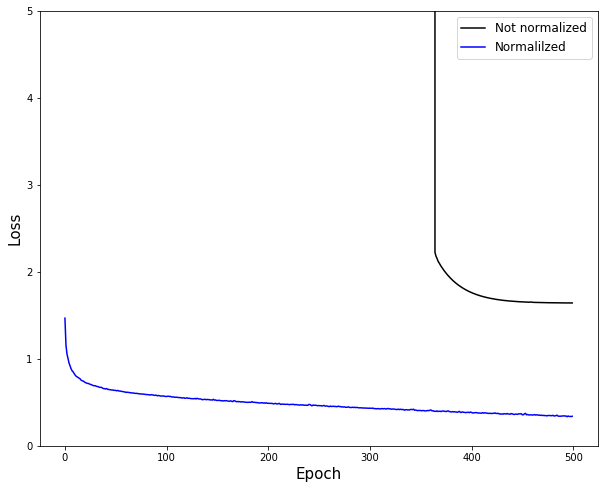

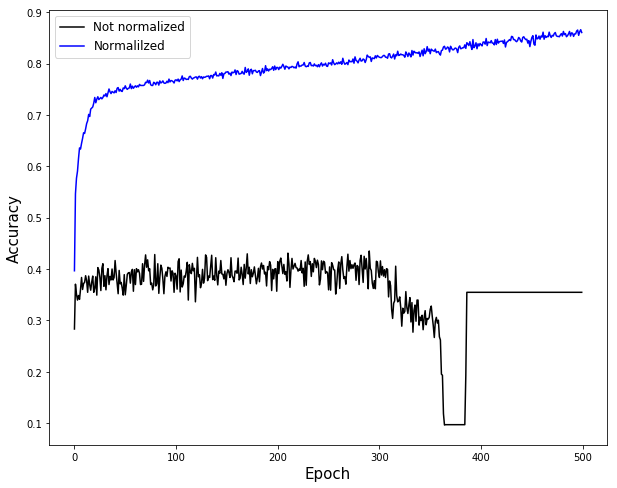

In [21]:
not_n_alpha = 1
n_alpha = 1

plt.figure(figsize=(10,8))
plt.plot(np.arange(len(training_records.history['loss'])), training_records.history['loss'], 'k-', alpha = not_n_alpha, label = 'Not normalized')
plt.plot(np.arange(len(training_records_n.history['loss'])), training_records_n.history['loss'], 'b-', alpha = n_alpha,  label = 'Normalilzed')
plt.xlabel('Epoch', fontsize = 15)
plt.ylabel('Loss', fontsize = 15)
plt.ylim([0, 5])
plt.legend(fontsize = 12)
plt.show()

plt.figure(figsize=(10,8))
plt.plot(np.arange(len(training_records.history['accuracy'])), training_records.history['accuracy'], 'k-', alpha = not_n_alpha, label = 'Not normalized')
plt.plot(np.arange(len(training_records_n.history['accuracy'])), training_records_n.history['accuracy'], 'b-', alpha = n_alpha,  label = 'Normalilzed')
plt.xlabel('Epoch', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.legend(fontsize = 12)
plt.show()

## 4.3. Batch Normalization (Feature Scaling)

<img src='.\image_files\batch_normalization.png' width = 1000>

Batchnormalization is required for better classification performance.

In [15]:
model_bn = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape = (n_input)),
    tf.keras.layers.Dense(n_hidden1, activation = tf.nn.relu),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(n_hidden2, activation = 'relu'),
    tf.keras.layers.BatchNormalization(), 
    tf.keras.layers.Dense(n_output, activation = 'softmax') # 확률적으로 7개 결과값이 나옴
    ])

model_bn.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy', # softmax해서 나온 것과 one hot encoding이 다르기 떄문에 sparse
              metrics = ['accuracy'])

In [16]:
model_bn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               2800      
_________________________________________________________________
batch_normalization (BatchNo (None, 100)               400       
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
batch_normalization_1 (Batch (None, 50)                200       
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 357       
Total params: 8,807
Trainable params: 8,507
Non-trainable params: 300
_________________________________________________________________


In [17]:
%%time

training_records_bn = model_bn.fit(train_X_n, train_Y_n, batch_size = n_batch, epochs=n_epoch)

Epoch 1/500
23/23 [==============================] - 0s 4ms/step - loss: 1.6601 - accuracy: 0.4302
Epoch 2/500
23/23 [==============================] - 0s 4ms/step - loss: 1.0914 - accuracy: 0.6296
Epoch 3/500
23/23 [==============================] - 0s 4ms/step - loss: 0.9131 - accuracy: 0.6845
Epoch 4/500
23/23 [==============================] - 0s 4ms/step - loss: 0.8226 - accuracy: 0.7148
Epoch 5/500
23/23 [==============================] - 0s 4ms/step - loss: 0.7641 - accuracy: 0.7237
Epoch 6/500
23/23 [==============================] - 0s 4ms/step - loss: 0.7571 - accuracy: 0.7271
Epoch 7/500
23/23 [==============================] - 0s 4ms/step - loss: 0.6877 - accuracy: 0.7526
Epoch 8/500
23/23 [==============================] - 0s 4ms/step - loss: 0.6596 - accuracy: 0.7636
Epoch 9/500
23/23 [==============================] - 0s 4ms/step - loss: 0.6427 - accuracy: 0.7588
Epoch 10/500
23/23 [==============================] - 0s 4ms/step - loss: 0.6052 - accuracy: 0.7773
Epoch 11/

23/23 [==============================] - 0s 4ms/step - loss: 0.1958 - accuracy: 0.9340
Epoch 84/500
23/23 [==============================] - 0s 4ms/step - loss: 0.2036 - accuracy: 0.9306
Epoch 85/500
23/23 [==============================] - 0s 4ms/step - loss: 0.1860 - accuracy: 0.9457
Epoch 86/500
23/23 [==============================] - 0s 4ms/step - loss: 0.2093 - accuracy: 0.9230
Epoch 87/500
23/23 [==============================] - 0s 4ms/step - loss: 0.1774 - accuracy: 0.9375
Epoch 88/500
23/23 [==============================] - 0s 4ms/step - loss: 0.1838 - accuracy: 0.9347
Epoch 89/500
23/23 [==============================] - 0s 4ms/step - loss: 0.1883 - accuracy: 0.9340
Epoch 90/500
23/23 [==============================] - 0s 4ms/step - loss: 0.1863 - accuracy: 0.9333
Epoch 91/500
23/23 [==============================] - 0s 4ms/step - loss: 0.1724 - accuracy: 0.9464
Epoch 92/500
23/23 [==============================] - 0s 4ms/step - loss: 0.1900 - accuracy: 0.9326
Epoch 93/500


23/23 [==============================] - 0s 4ms/step - loss: 0.0451 - accuracy: 0.9904
Epoch 246/500
23/23 [==============================] - 0s 4ms/step - loss: 0.0544 - accuracy: 0.9835
Epoch 247/500
23/23 [==============================] - 0s 4ms/step - loss: 0.0510 - accuracy: 0.9835
Epoch 248/500
23/23 [==============================] - 0s 4ms/step - loss: 0.0556 - accuracy: 0.9876
Epoch 249/500
23/23 [==============================] - 0s 4ms/step - loss: 0.0620 - accuracy: 0.9821
Epoch 250/500
23/23 [==============================] - 0s 4ms/step - loss: 0.0599 - accuracy: 0.9780
Epoch 251/500
23/23 [==============================] - 0s 4ms/step - loss: 0.0726 - accuracy: 0.9766
Epoch 252/500
23/23 [==============================] - 0s 4ms/step - loss: 0.0621 - accuracy: 0.9801
Epoch 253/500
23/23 [==============================] - 0s 4ms/step - loss: 0.0571 - accuracy: 0.9801
Epoch 254/500
23/23 [==============================] - 0s 4ms/step - loss: 0.0550 - accuracy: 0.9863
Epoc

23/23 [==============================] - 0s 4ms/step - loss: 0.0365 - accuracy: 0.9876
Epoch 408/500
23/23 [==============================] - 0s 4ms/step - loss: 0.0312 - accuracy: 0.9918
Epoch 409/500
23/23 [==============================] - 0s 4ms/step - loss: 0.0343 - accuracy: 0.9876
Epoch 410/500
23/23 [==============================] - 0s 4ms/step - loss: 0.0428 - accuracy: 0.9869
Epoch 411/500
23/23 [==============================] - 0s 4ms/step - loss: 0.0533 - accuracy: 0.9801
Epoch 412/500
23/23 [==============================] - 0s 4ms/step - loss: 0.0411 - accuracy: 0.9883
Epoch 413/500
23/23 [==============================] - 0s 4ms/step - loss: 0.0406 - accuracy: 0.9876
Epoch 414/500
23/23 [==============================] - 0s 4ms/step - loss: 0.0347 - accuracy: 0.9904
Epoch 415/500
23/23 [==============================] - 0s 4ms/step - loss: 0.0411 - accuracy: 0.9856
Epoch 416/500
23/23 [==============================] - 0s 4ms/step - loss: 0.0395 - accuracy: 0.9842
Epoc

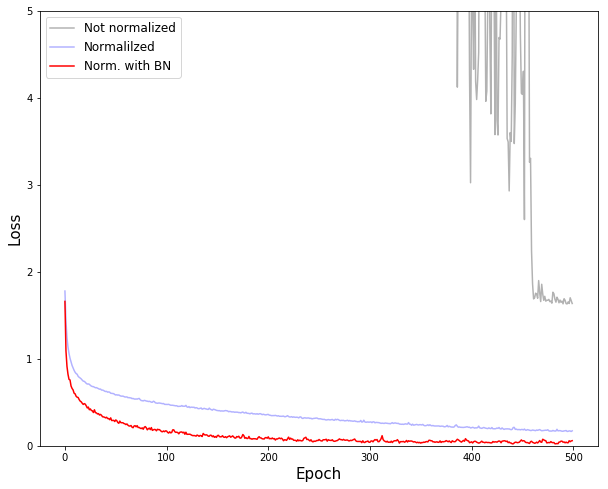

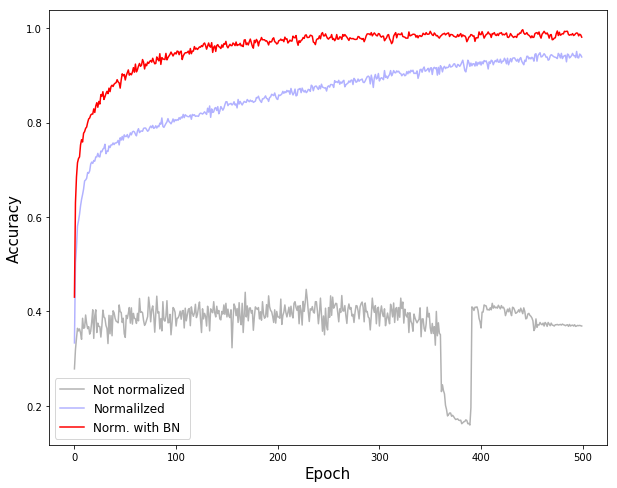

In [29]:
not_n_alpha = 0.3
n_alpha = 0.3
bn_alpha = 1
plt.figure(figsize=(10,8))
plt.plot(np.arange(len(training_records.history['loss'])), training_records.history['loss'], 'k-', alpha = not_n_alpha, label = 'Not normalized')
plt.plot(np.arange(len(training_records_n.history['loss'])), training_records_n.history['loss'], 'b-', alpha = n_alpha,  label = 'Normalilzed')
plt.plot(np.arange(len(training_records_bn.history['loss'])), training_records_bn.history['loss'], 'r-', alpha = bn_alpha,  label = 'Norm. with BN')
plt.xlabel('Epoch', fontsize = 15)
plt.ylabel('Loss', fontsize = 15)
plt.ylim([0, 5])
plt.legend(fontsize = 12)
plt.show()
plt.figure(figsize=(10,8))
plt.plot(np.arange(len(training_records.history['accuracy'])), training_records.history['accuracy'], 'k-', alpha = not_n_alpha, label = 'Not normalized')
plt.plot(np.arange(len(training_records_n.history['accuracy'])), training_records_n.history['accuracy'], 'b-', alpha = n_alpha,  label = 'Normalilzed')
plt.plot(np.arange(len(training_records_bn.history['accuracy'])), training_records_bn.history['accuracy'], 'r-', alpha = bn_alpha,  label = 'Norm. with BN')
plt.xlabel('Epoch', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.legend(fontsize = 12)
plt.show()

## 4.4. Validation to prevent _"Overfitting"_

Initialize model parameter 

In [59]:
'''
Train : Val : Test = 70 : 10 : 20
'''
train_X_n, test_X_n, train_Y_n, test_Y_n = train_test_split(x_norm, y_class, test_size=0.2) # 80:20
train_X_n, valid_X_n, train_Y_n, valid_Y_n = train_test_split(train_X_n, train_Y_n, test_size=0.125) # 70:10

# train_X_n 오브젝트 타입에서 실수타입으로 변환
train_X_n = train_X_n.astype(np.float32)
valid_X_n = valid_X_n.astype(np.float32)
test_X_n = test_X_n.astype(np.float32)

In [60]:
train_X_n.shape, valid_X_n.shape, test_X_n.shape

((1358, 27), (194, 27), (389, 27))

In [61]:
# Define Structure
model_n = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape = (n_input)),
        tf.keras.layers.Dense(n_hidden1, activation = 'relu'),
        tf.keras.layers.Dense(n_hidden2, activation = 'relu'),
        tf.keras.layers.Dense(n_output, activation = 'softmax')
    ])

# adam optimizer, cross entropy
model_n.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy', # softmax해서 나온 것과 one hot encoding이 다르기 떄문에 sparse
              metrics = ['accuracy'])

By using validation data, we can check whether model goes to overfitting or not.

In [62]:
%%time

training_records_v = model_n.fit(train_X_n, train_Y_n,
                                validation_data = (valid_X_n, valid_Y_n), #validation 한줄 추가
                                batch_size= n_batch, epochs=n_epoch)

Epoch 1/500
22/22 [==============================] - 0s 7ms/step - loss: 1.7210 - accuracy: 0.3535 - val_loss: 1.5123 - val_accuracy: 0.3660
Epoch 2/500
22/22 [==============================] - 0s 4ms/step - loss: 1.4013 - accuracy: 0.4809 - val_loss: 1.2840 - val_accuracy: 0.5670
Epoch 3/500
22/22 [==============================] - 0s 4ms/step - loss: 1.2264 - accuracy: 0.5692 - val_loss: 1.1360 - val_accuracy: 0.6031
Epoch 4/500
22/22 [==============================] - 0s 4ms/step - loss: 1.1060 - accuracy: 0.5906 - val_loss: 1.0424 - val_accuracy: 0.5670
Epoch 5/500
22/22 [==============================] - 0s 5ms/step - loss: 1.0310 - accuracy: 0.5979 - val_loss: 0.9846 - val_accuracy: 0.5979
Epoch 6/500
22/22 [==============================] - 0s 4ms/step - loss: 0.9845 - accuracy: 0.6208 - val_loss: 0.9448 - val_accuracy: 0.6340
Epoch 7/500
22/22 [==============================] - 0s 4ms/step - loss: 0.9458 - accuracy: 0.6392 - val_loss: 0.9135 - val_accuracy: 0.6289
Epoch 8/500
2

Epoch 59/500
22/22 [==============================] - 0s 4ms/step - loss: 0.5503 - accuracy: 0.7850 - val_loss: 0.7229 - val_accuracy: 0.6907
Epoch 60/500
22/22 [==============================] - 0s 4ms/step - loss: 0.5501 - accuracy: 0.7857 - val_loss: 0.7144 - val_accuracy: 0.6959
Epoch 61/500
22/22 [==============================] - 0s 4ms/step - loss: 0.5450 - accuracy: 0.7865 - val_loss: 0.7239 - val_accuracy: 0.7113
Epoch 62/500
22/22 [==============================] - 0s 4ms/step - loss: 0.5493 - accuracy: 0.7791 - val_loss: 0.7186 - val_accuracy: 0.7062
Epoch 63/500
22/22 [==============================] - 0s 4ms/step - loss: 0.5462 - accuracy: 0.7857 - val_loss: 0.7216 - val_accuracy: 0.7010
Epoch 64/500
22/22 [==============================] - 0s 4ms/step - loss: 0.5416 - accuracy: 0.7938 - val_loss: 0.7225 - val_accuracy: 0.7165
Epoch 65/500
22/22 [==============================] - 0s 4ms/step - loss: 0.5402 - accuracy: 0.7865 - val_loss: 0.7112 - val_accuracy: 0.7010
Epoch 

22/22 [==============================] - 0s 20ms/step - loss: 0.3803 - accuracy: 0.8490 - val_loss: 0.6838 - val_accuracy: 0.7113
Epoch 174/500
22/22 [==============================] - 0s 4ms/step - loss: 0.3775 - accuracy: 0.8542 - val_loss: 0.6812 - val_accuracy: 0.7268
Epoch 175/500
22/22 [==============================] - 0s 4ms/step - loss: 0.3865 - accuracy: 0.8439 - val_loss: 0.6655 - val_accuracy: 0.7010
Epoch 176/500
22/22 [==============================] - 0s 5ms/step - loss: 0.3808 - accuracy: 0.8505 - val_loss: 0.6724 - val_accuracy: 0.7320
Epoch 177/500
22/22 [==============================] - 0s 4ms/step - loss: 0.3854 - accuracy: 0.8432 - val_loss: 0.6741 - val_accuracy: 0.7268
Epoch 178/500
22/22 [==============================] - 0s 4ms/step - loss: 0.3744 - accuracy: 0.8520 - val_loss: 0.6753 - val_accuracy: 0.7268
Epoch 179/500
22/22 [==============================] - 0s 4ms/step - loss: 0.3739 - accuracy: 0.8513 - val_loss: 0.6685 - val_accuracy: 0.7371
Epoch 180/50

22/22 [==============================] - 0s 4ms/step - loss: 0.2747 - accuracy: 0.8925 - val_loss: 0.7199 - val_accuracy: 0.7216
Epoch 288/500
22/22 [==============================] - 0s 5ms/step - loss: 0.2685 - accuracy: 0.8991 - val_loss: 0.6981 - val_accuracy: 0.7629
Epoch 289/500
22/22 [==============================] - 0s 4ms/step - loss: 0.2723 - accuracy: 0.8984 - val_loss: 0.7139 - val_accuracy: 0.7526
Epoch 290/500
22/22 [==============================] - 0s 5ms/step - loss: 0.2694 - accuracy: 0.8932 - val_loss: 0.7119 - val_accuracy: 0.7423
Epoch 291/500
22/22 [==============================] - 0s 4ms/step - loss: 0.2643 - accuracy: 0.8940 - val_loss: 0.7117 - val_accuracy: 0.7474
Epoch 292/500
22/22 [==============================] - 0s 5ms/step - loss: 0.2716 - accuracy: 0.9006 - val_loss: 0.7307 - val_accuracy: 0.7320
Epoch 293/500
22/22 [==============================] - 0s 4ms/step - loss: 0.2789 - accuracy: 0.8822 - val_loss: 0.7224 - val_accuracy: 0.7423
Epoch 294/500

22/22 [==============================] - 0s 5ms/step - loss: 0.1971 - accuracy: 0.9286 - val_loss: 0.8180 - val_accuracy: 0.7474
Epoch 402/500
22/22 [==============================] - 0s 4ms/step - loss: 0.1922 - accuracy: 0.9323 - val_loss: 0.8841 - val_accuracy: 0.7526
Epoch 403/500
22/22 [==============================] - 0s 4ms/step - loss: 0.1978 - accuracy: 0.9330 - val_loss: 0.8591 - val_accuracy: 0.7423
Epoch 404/500
22/22 [==============================] - 0s 5ms/step - loss: 0.1916 - accuracy: 0.9337 - val_loss: 0.8513 - val_accuracy: 0.7526
Epoch 405/500
22/22 [==============================] - 0s 4ms/step - loss: 0.1875 - accuracy: 0.9374 - val_loss: 0.8565 - val_accuracy: 0.7526
Epoch 406/500
22/22 [==============================] - 0s 5ms/step - loss: 0.1847 - accuracy: 0.9367 - val_loss: 0.8998 - val_accuracy: 0.7216
Epoch 407/500
22/22 [==============================] - 0s 4ms/step - loss: 0.1970 - accuracy: 0.9242 - val_loss: 0.8448 - val_accuracy: 0.7629
Epoch 408/500

In [63]:
# Define Structure
model_bn = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape = (n_input)),
    tf.keras.layers.Dense(n_hidden1, activation = tf.nn.relu),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(n_hidden2, activation = 'relu'),
    tf.keras.layers.BatchNormalization(), 
    tf.keras.layers.Dense(n_output, activation = 'softmax')
    ])

# adam optimizer, cross entropy
model_bn.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
%%time

training_records_bn_v =  model_bn.fit(train_X_n, train_Y_n,
                                     validation_data = (valid_X_n, valid_Y_n), #validation 한줄 추가
                                     batch_size= n_batch, epochs=n_epoch)

In [65]:
model_bn.save('./Model') # 경로에 모델 저장하기

INFO:tensorflow:Assets written to: ./Model/assets


In [72]:
model_bn.save('./Model/ANN.h5')

In [66]:
model_temp = tf.keras.models.load_model('./Model') # 경로에 모델 불러오기

In [73]:
model_h5 = tf.keras.models.load_model('./Model/ANN.h5') # 경로에 모델 불러오기

In [67]:
model_temp.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 100)               2800      
_________________________________________________________________
batch_normalization_6 (Batch (None, 100)               400       
_________________________________________________________________
dense_37 (Dense)             (None, 50)                5050      
_________________________________________________________________
batch_normalization_7 (Batch (None, 50)                200       
_________________________________________________________________
dense_38 (Dense)             (None, 7)                 357       
Total params: 8,807
Trainable params: 8,507
Non-trainable params: 300
_________________________________________________________________


In [74]:
model_h5.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 100)               2800      
_________________________________________________________________
batch_normalization_6 (Batch (None, 100)               400       
_________________________________________________________________
dense_37 (Dense)             (None, 50)                5050      
_________________________________________________________________
batch_normalization_7 (Batch (None, 50)                200       
_________________________________________________________________
dense_38 (Dense)             (None, 7)                 357       
Total params: 8,807
Trainable params: 8,507
Non-trainable params: 300
_________________________________________________________________


In [71]:
model_temp.predict(test_X_n).shape

(389, 7)

In [50]:
%%time
'''
callback을 통한 early stop
'''
from tensorflow.keras import callbacks

training_records_bn_v =  model_bn.fit(train_X_n, train_Y_n,
                                     validation_data = (valid_X_n, valid_Y_n), #validation 한줄 추가
                                     batch_size= n_batch, epochs=n_epoch,
                                     callbacks=[callbacks.EarlyStopping(monitor='val_loss',
                                                                                   patience = 50,
                                                                                   restore_best_weights=True)])

'''
모델의 구조 저장 및 불러오기(Parameter)

model_bn.save('./')
model = tf.keras.models.load_model('./')
'''

Epoch 1/500
22/22 [==============================] - 0s 10ms/step - loss: 1.6023 - accuracy: 0.4013 - val_loss: 1.7287 - val_accuracy: 0.4742
Epoch 2/500
22/22 [==============================] - 0s 6ms/step - loss: 1.1122 - accuracy: 0.6303 - val_loss: 1.6647 - val_accuracy: 0.5258
Epoch 3/500
22/22 [==============================] - 0s 6ms/step - loss: 0.9646 - accuracy: 0.6789 - val_loss: 1.6192 - val_accuracy: 0.4485
Epoch 4/500
22/22 [==============================] - 0s 6ms/step - loss: 0.8591 - accuracy: 0.7113 - val_loss: 1.5674 - val_accuracy: 0.4278
Epoch 5/500
22/22 [==============================] - 0s 6ms/step - loss: 0.8017 - accuracy: 0.7275 - val_loss: 1.5284 - val_accuracy: 0.4485
Epoch 6/500
22/22 [==============================] - 0s 6ms/step - loss: 0.7359 - accuracy: 0.7482 - val_loss: 1.4951 - val_accuracy: 0.4485
Epoch 7/500
22/22 [==============================] - 0s 6ms/step - loss: 0.7124 - accuracy: 0.7563 - val_loss: 1.4514 - val_accuracy: 0.4536
Epoch 8/500


Epoch 59/500
22/22 [==============================] - 0s 6ms/step - loss: 0.2737 - accuracy: 0.9013 - val_loss: 0.6907 - val_accuracy: 0.7371
Epoch 60/500
22/22 [==============================] - 0s 6ms/step - loss: 0.2638 - accuracy: 0.9065 - val_loss: 0.7261 - val_accuracy: 0.7371
Epoch 61/500
22/22 [==============================] - 0s 6ms/step - loss: 0.2398 - accuracy: 0.9183 - val_loss: 0.8074 - val_accuracy: 0.7320
Epoch 62/500
22/22 [==============================] - 0s 6ms/step - loss: 0.2424 - accuracy: 0.9183 - val_loss: 0.7326 - val_accuracy: 0.7165
Epoch 63/500
22/22 [==============================] - 0s 6ms/step - loss: 0.2494 - accuracy: 0.9138 - val_loss: 0.7251 - val_accuracy: 0.7474
Epoch 64/500
22/22 [==============================] - 0s 6ms/step - loss: 0.2617 - accuracy: 0.8954 - val_loss: 0.6938 - val_accuracy: 0.7423
Epoch 65/500
22/22 [==============================] - 0s 6ms/step - loss: 0.2687 - accuracy: 0.9065 - val_loss: 0.8737 - val_accuracy: 0.7268
Epoch 

There are more history records. 

In [68]:
training_records_v.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [69]:
training_records_bn_v.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

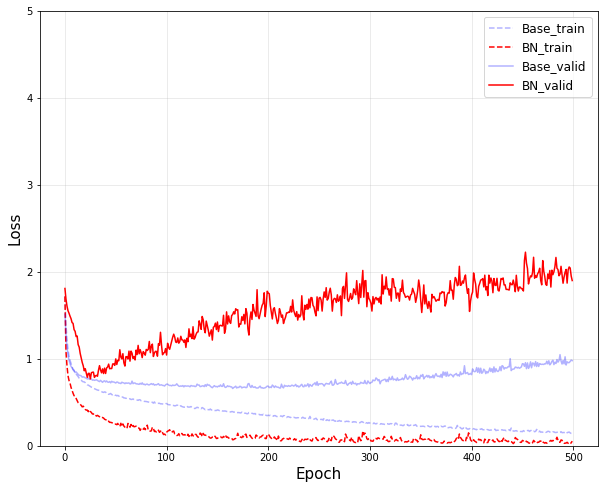

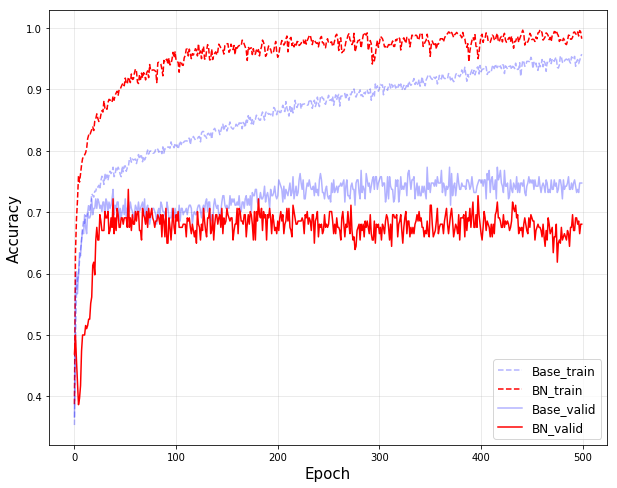

In [70]:
# train data의 loss는 계속 줄어들기 때문에 의미없음.
# validation의 loss를 check
# loss가 줄어들다가 증가하게 되는데 증가하는 부분이 overfitting

base_alpha = 0.3
bn_alpha = 1
n_prt = 1 #생략

plt.figure(figsize=(10,8))
plt.plot(np.arange(len(training_records_v.history['loss']))*n_prt, training_records_v.history['loss'], 'b--', alpha = base_alpha, label = 'Base_train')
plt.plot(np.arange(len(training_records_bn_v.history['loss']))*n_prt, training_records_bn_v.history['loss'], 'r--', alpha = bn_alpha, label = 'BN_train')
plt.plot(np.arange(len(training_records_v.history['val_loss']))*n_prt, training_records_v.history['val_loss'], 'b-', alpha = base_alpha, label = 'Base_valid')
plt.plot(np.arange(len(training_records_bn_v.history['val_loss']))*n_prt, training_records_bn_v.history['val_loss'], 'r-', alpha = bn_alpha, label = 'BN_valid')
plt.xlabel('Epoch', fontsize = 15)
plt.ylabel('Loss', fontsize = 15)
plt.ylim([0, 5])
plt.legend(fontsize = 12)
plt.grid(alpha = 0.3)
plt.show()

plt.figure(figsize=(10,8))
plt.plot(np.arange(len(training_records_v.history['accuracy'])), training_records_v.history['accuracy'], 'b--', alpha = base_alpha, label = 'Base_train')
plt.plot(np.arange(len(training_records_bn_v.history['accuracy'])), training_records_bn_v.history['accuracy'], 'r--', alpha = bn_alpha, label = 'BN_train')
plt.plot(np.arange(len(training_records_v.history['val_accuracy'])), training_records_v.history['val_accuracy'], 'b-', alpha = base_alpha, label = 'Base_valid')
plt.plot(np.arange(len(training_records_bn_v.history['val_accuracy'])), training_records_bn_v.history['val_accuracy'], 'r-', alpha = bn_alpha, label = 'BN_valid')
plt.xlabel('Epoch', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.legend(fontsize = 12)
plt.grid(alpha = 0.3)
plt.show()

In [62]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>